# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('/content/heart_cleveland_upload.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [3]:
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
df.shape


(297, 14)

In [5]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [6]:
# Mengecek Missing Value

missing_value = df.isnull().sum()
missing_presentase = (missing_value / len(df) ) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_value,
    'Missing Presentase': missing_presentase

}).sort_values(by='Missing Values', ascending=False)

missing_data[missing_data['Missing Values'] > 0]

,Missing Values,Missing Presentase


In [7]:
df.info()
df.isna().sum()
print('Jumlah duplicate data', df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
Jumlah duplicate data 0


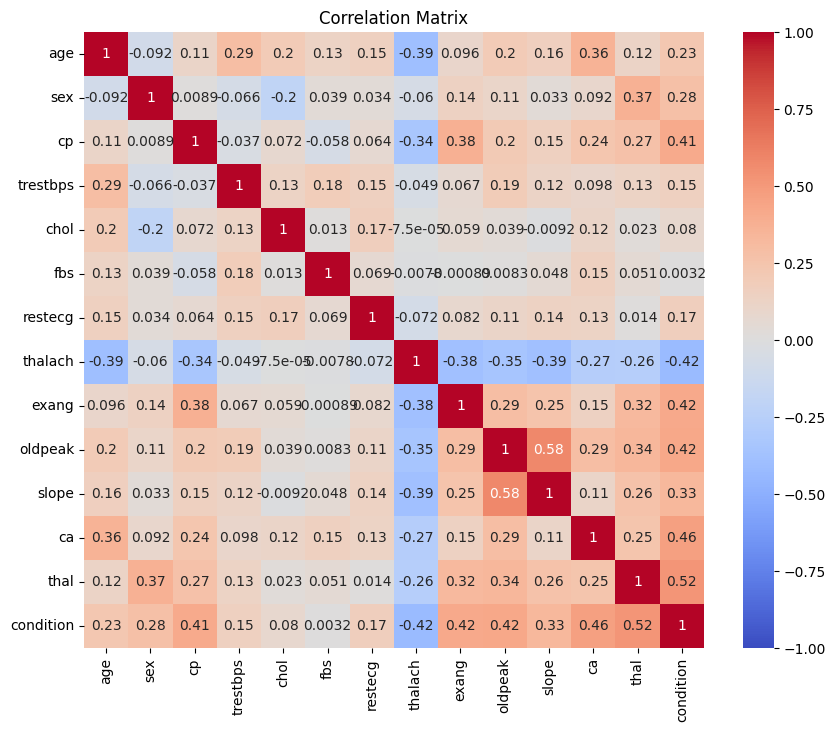

In [8]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

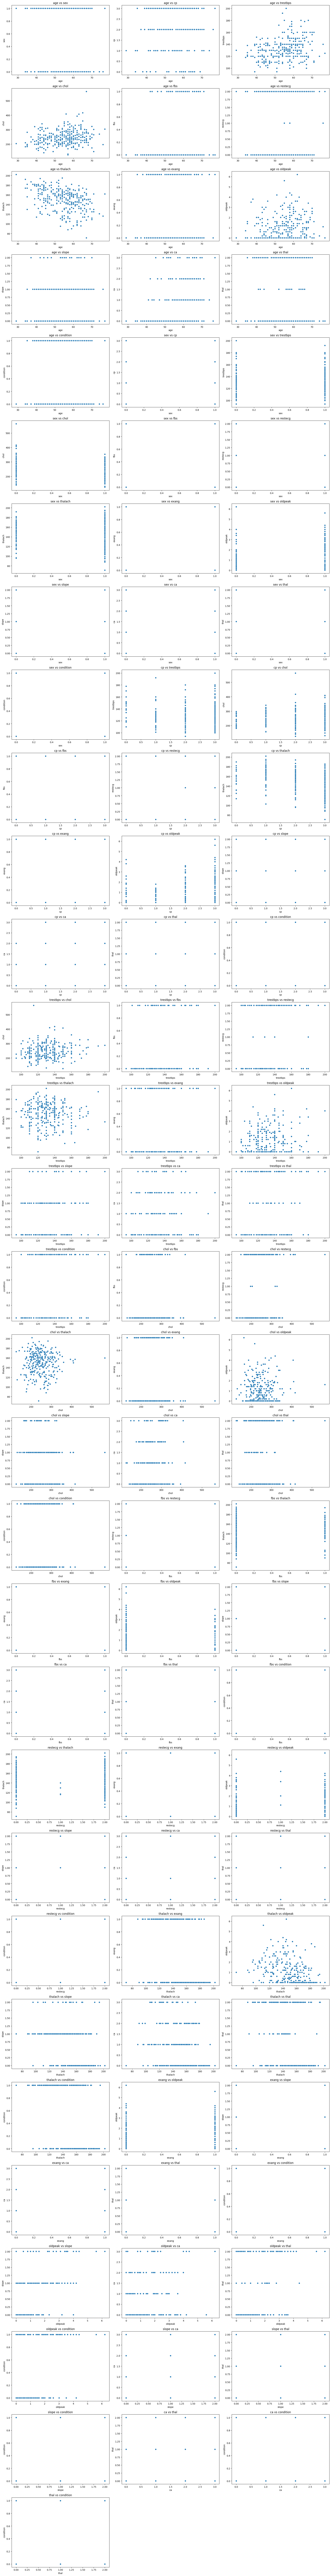

In [9]:
# Visualisasi data menggunakan scatter plot untuk kombinasi fitur numerik
import itertools

# Ambil hanya kolom numerik (exclude kategorikal/label jika perlu)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
pairs = list(itertools.combinations(numerical_columns, 2))  # Buat kombinasi pasangan kolom

cols = 3  # Jumlah kolom subplot
rows = -(-len(pairs) // cols)  # Hitung jumlah baris yang dibutuhkan

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5))
axes = axes.flatten()

for i, (x_col, y_col) in enumerate(pairs):
    sns.scatterplot(data=df, x=x_col, y=y_col, ax=axes[i])
    axes[i].set_title(f'{x_col} vs {y_col}')
    axes[i].set_xlabel(x_col)
    axes[i].set_ylabel(y_col)

# Hapus sisa subplot kosong kalau ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


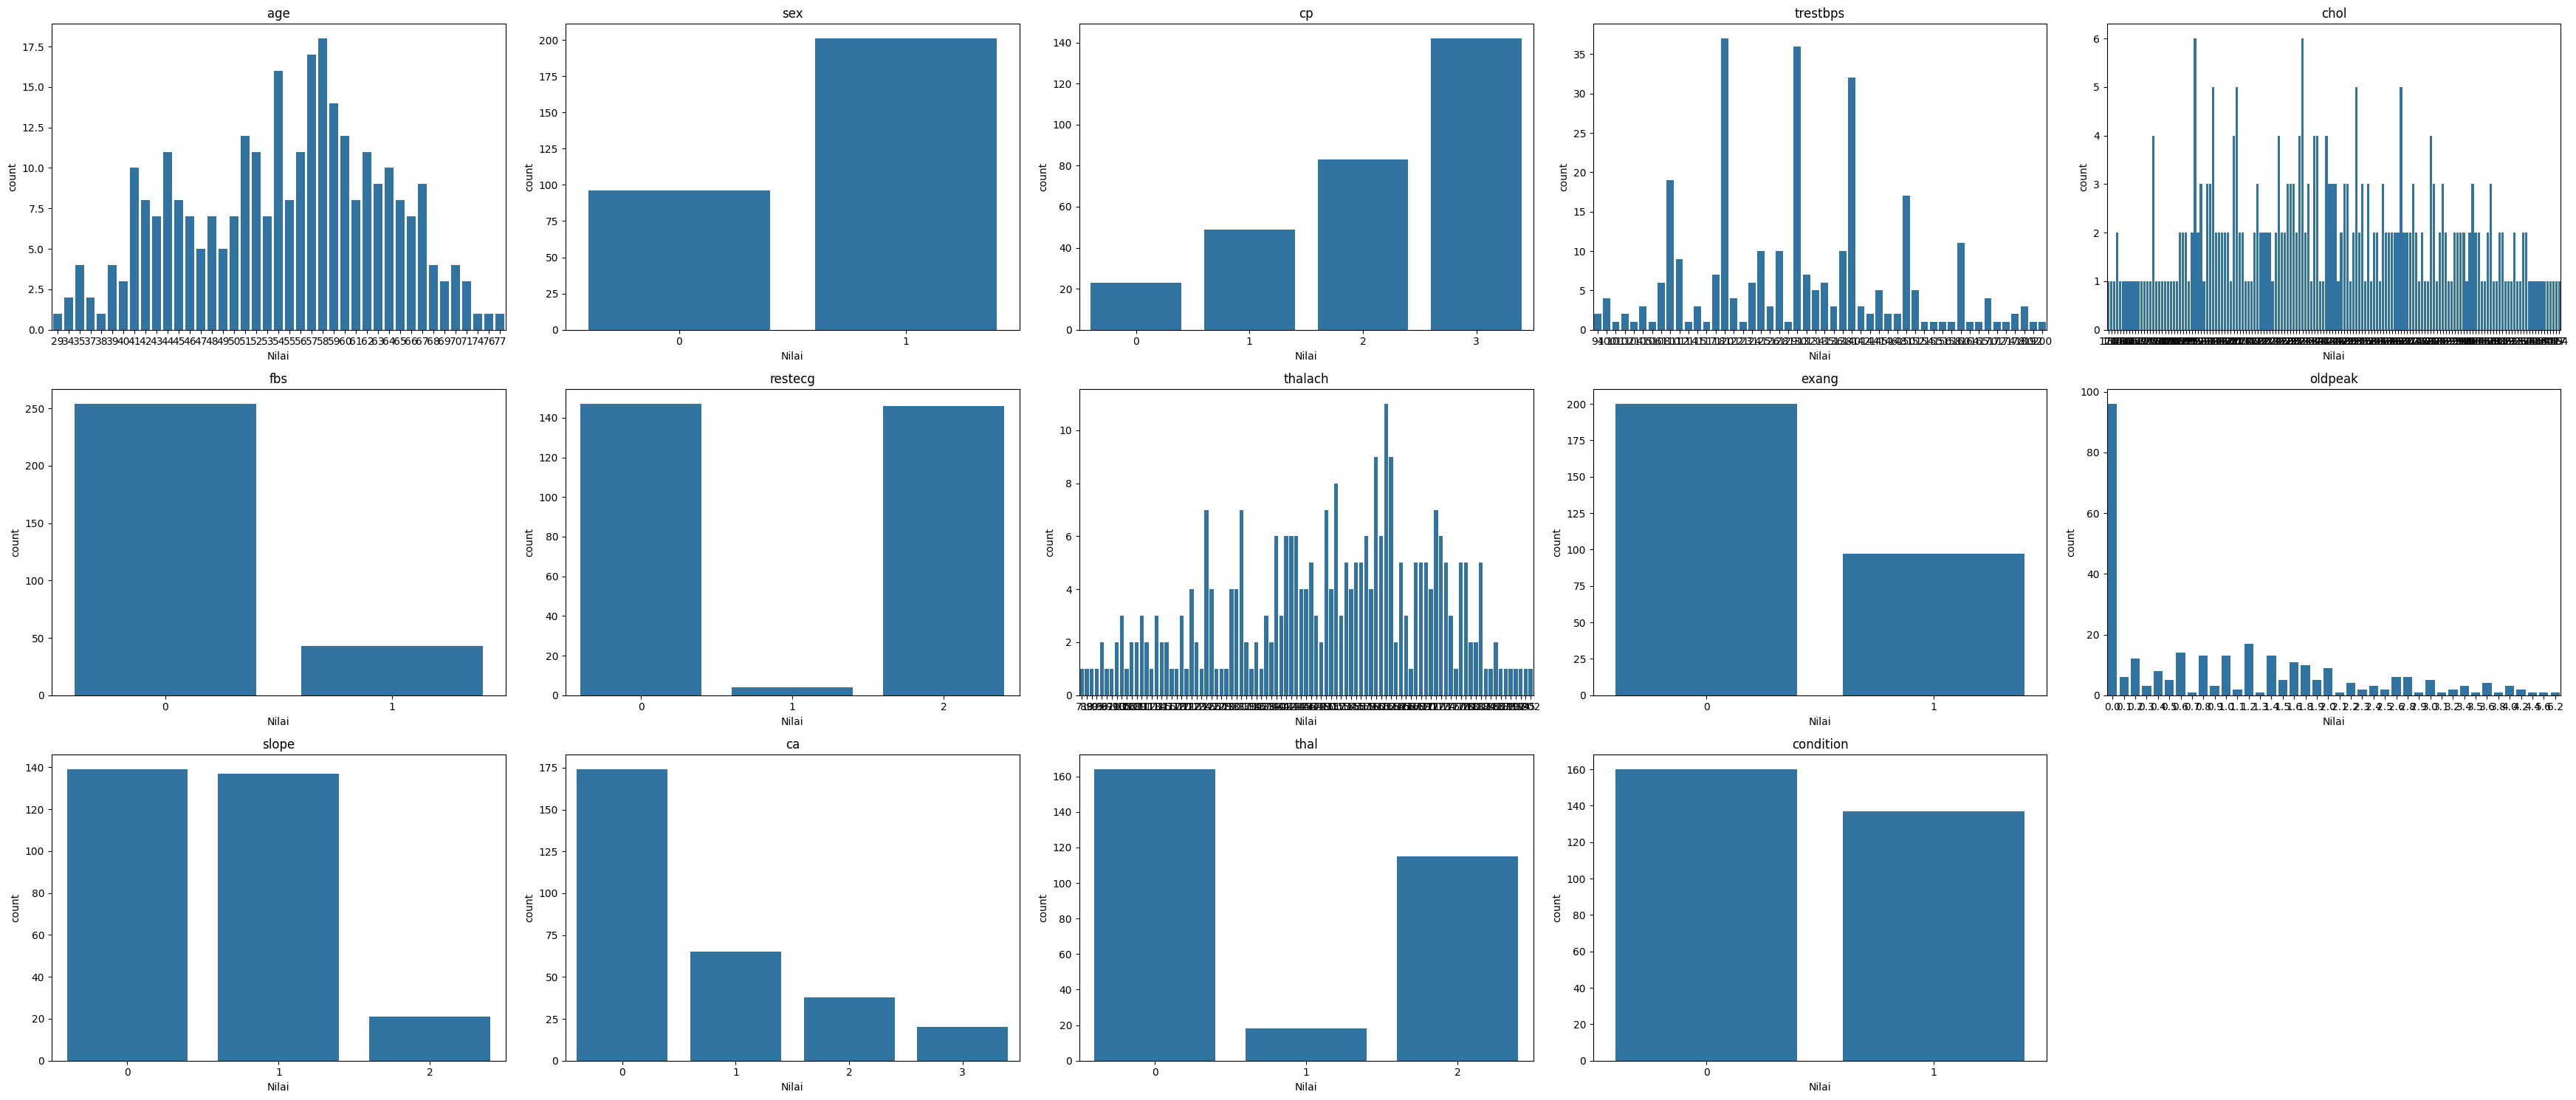

In [10]:
# Visualisasi data menggunakan diagram batang
kat_var = df.shape[1] # Ngitung jumlah variabel

cols = 5 # Menentukan jumlah baris dan kolom untuk grid subplot
rows =  -(-kat_var // cols) # Nenutin jumlah baris

fig, axes = plt.subplots(rows, cols, figsize=(35, rows * 5)) # Buat plot

axes = axes.flatten() # Mengubah array dua dimensi axes menjadi satu dimensi

for i, column in enumerate(df.columns):
  sns.countplot(data=df, x=column, ax=axes[i])
  axes[i].set_title(column)
  axes[i].set_xlabel('Nilai')

# Menghapus subplot yang tidak terpakai kalau ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

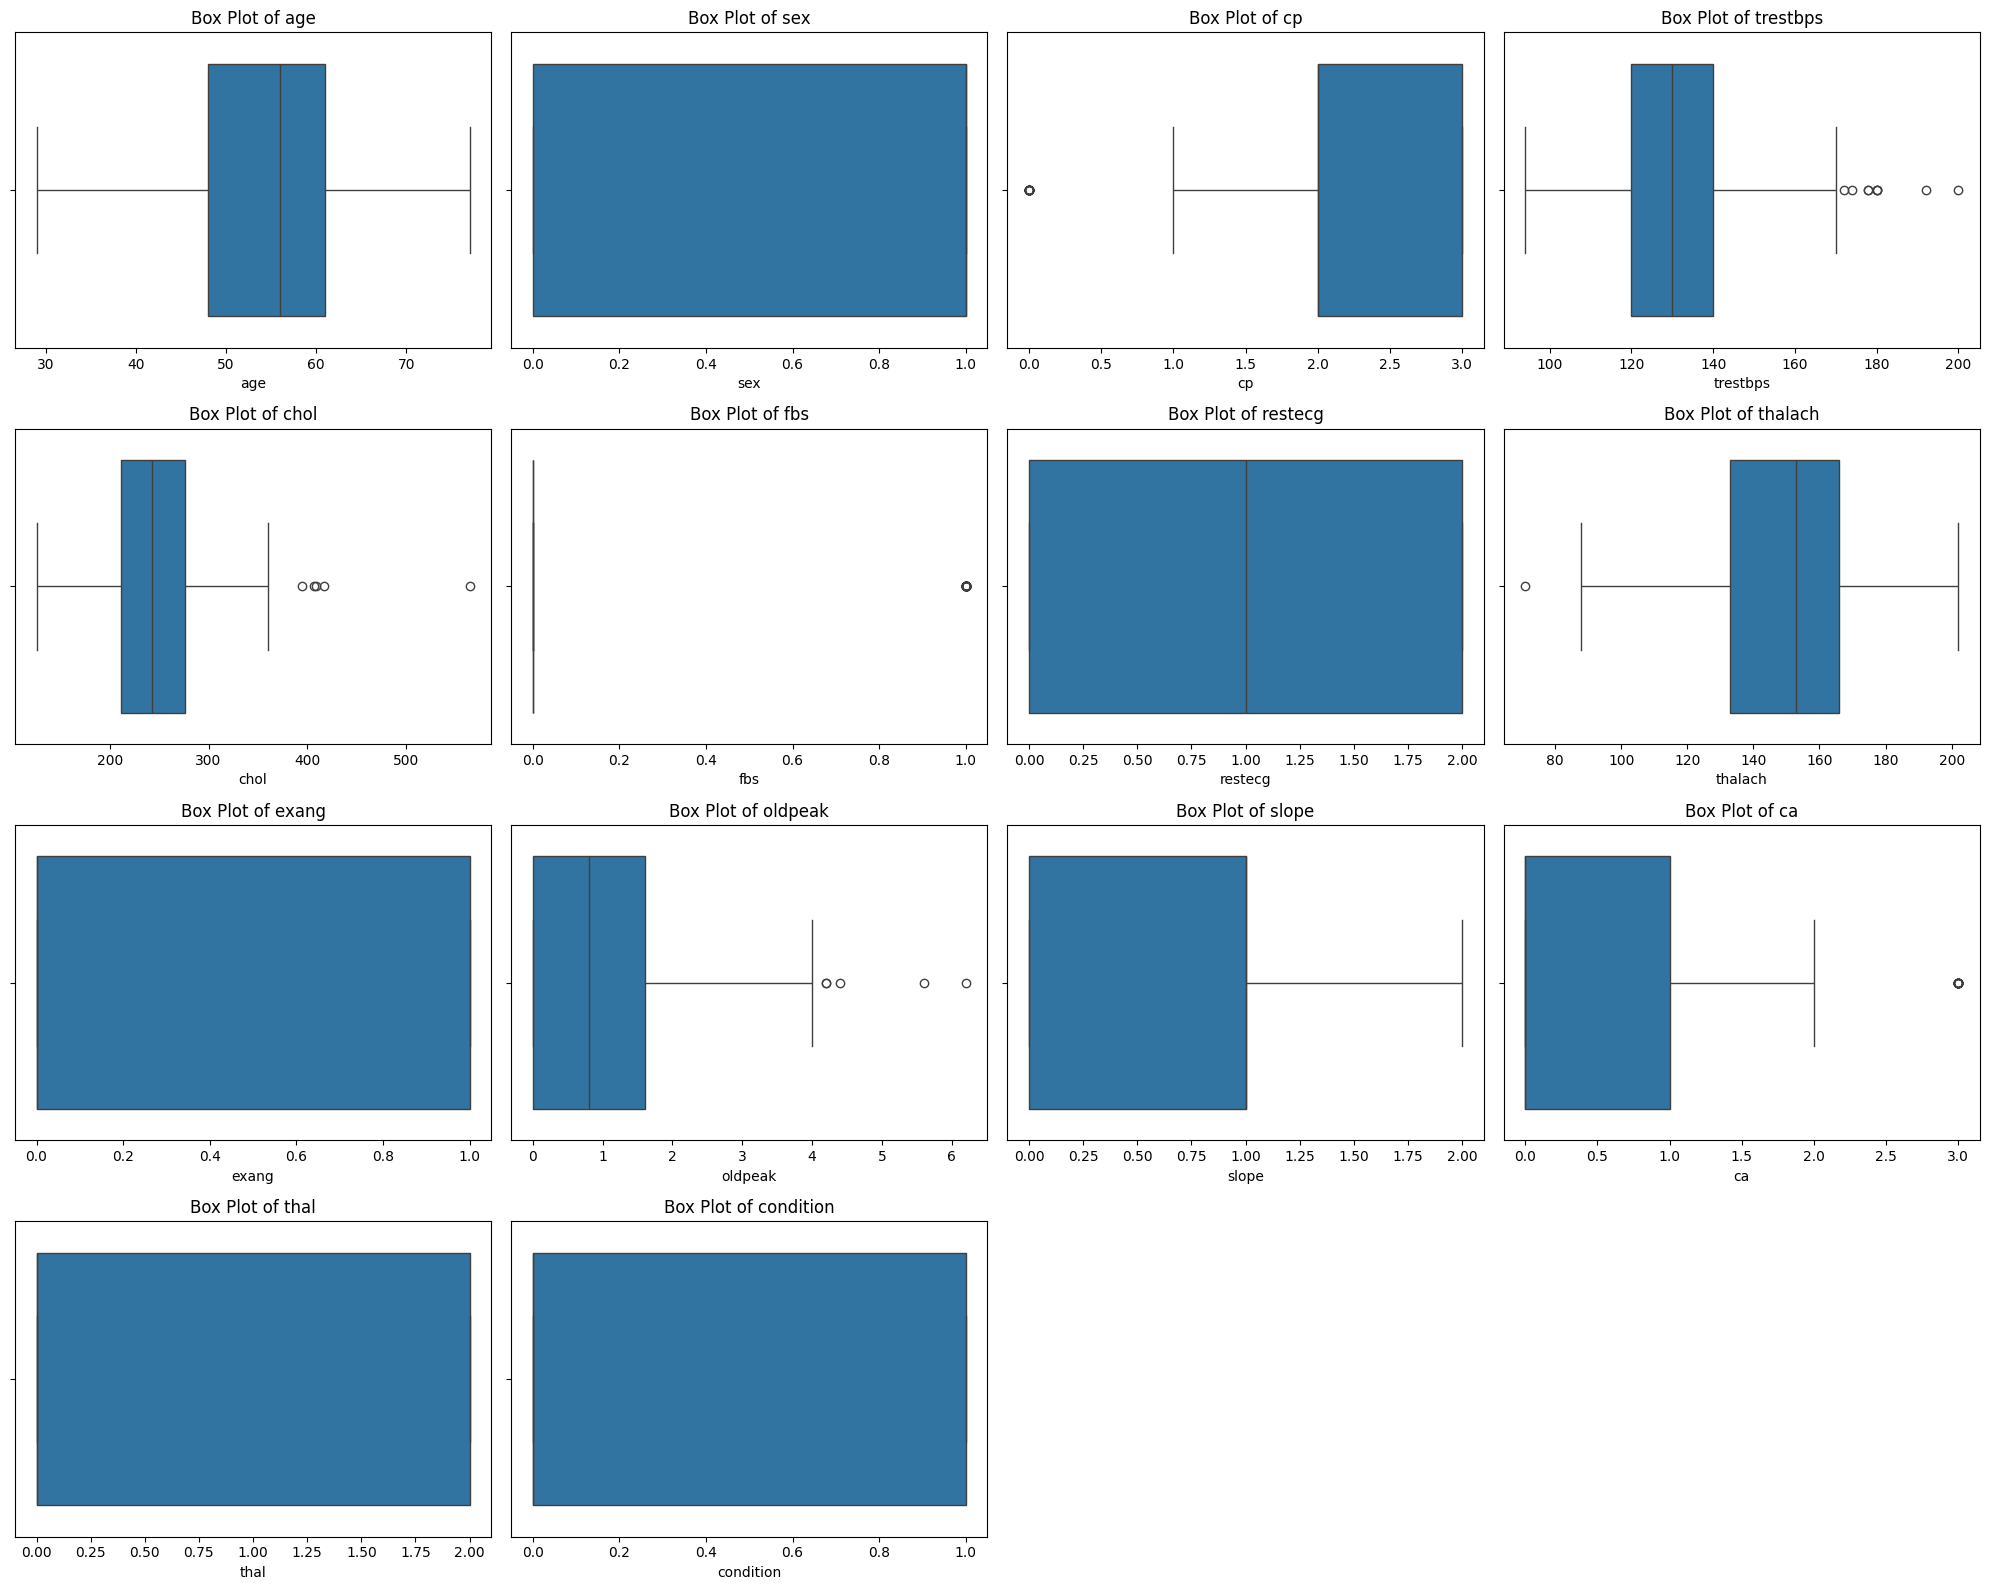

In [11]:
# Cek outlier

numerik_var = df.shape[1]

# Menentukan jumlah baris dan kolom untuk grid subplot
cols = 4  # Menentukan jumlah kolom
rows = -(-numerik_var // cols)  # Menentukan jumlah baris berdasarkan jumlah fitur

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 4))  # Buat plot
axes = axes.flatten()  # Mengubah array dua dimensi axes menjadi satu dimensi

# Membuat box plot untuk setiap fitur numerik
for i, feature in enumerate(df.columns):
    sns.boxplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')

# Menghapus subplot yang tidak terpakai jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Mengatur tata letak agar plot tidak tumpang tindih
plt.show()

In [12]:
# Bersihin Outlier

columns = ['age', 'cp', 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak','slope','ca']

for column in columns :
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Hitung nilai median untuk mengganti outlier
  median = df[column].median()

  # Mengganti outlier dengan median
  df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

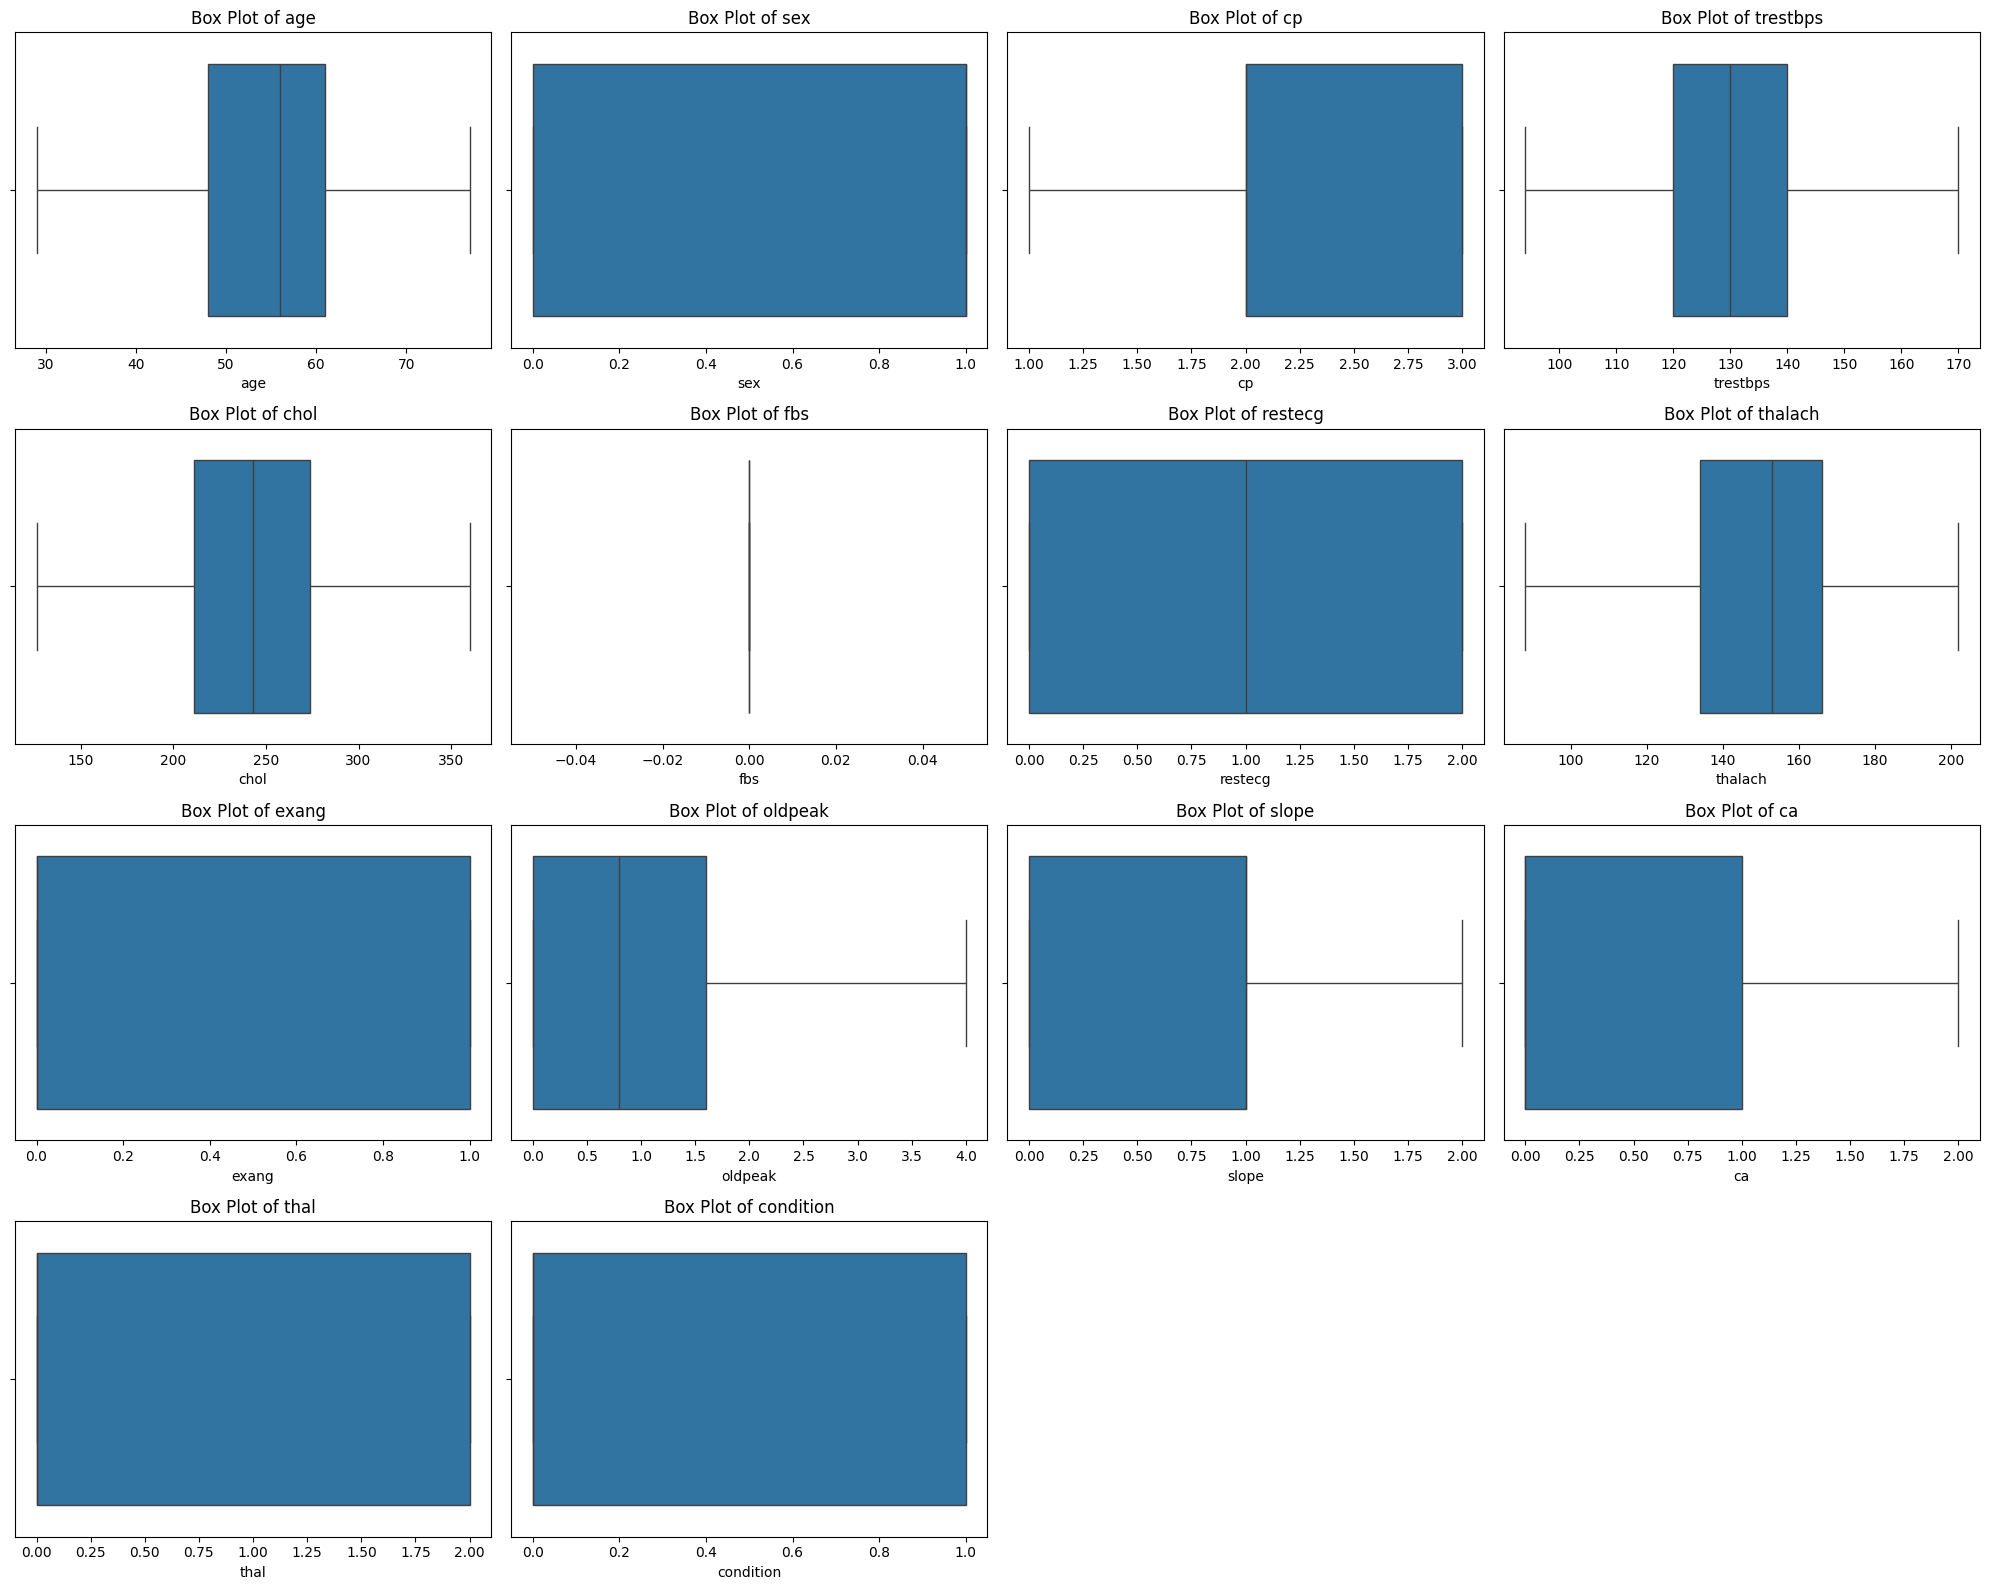

In [13]:
# Cek outlier setelah dibersihin

numerik_var = df.shape[1]

# Menentukan jumlah baris dan kolom untuk grid subplot
cols = 4  # Menentukan jumlah kolom
rows = -(-numerik_var // cols)  # Menentukan jumlah baris berdasarkan jumlah fitur

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 4))  # Buat plot
axes = axes.flatten()  # Mengubah array dua dimensi axes menjadi satu dimensi

# Membuat box plot untuk setiap fitur numerik
for i, feature in enumerate(df.columns):
    sns.boxplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')

# Menghapus subplot yang tidak terpakai jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Mengatur tata letak agar plot tidak tumpang tindih
plt.show()

In [14]:
# Standarnisasi

X = df.drop('condition', axis=1)
y = df['condition']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Gabungkan dengan label y
df_scaled = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)
df_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,1.600302,0.691095,-0.424141,1.949915,-0.224844,0.0,1.010199,-0.841024,-0.696419,-0.849342,0.643781,0.738947,-0.874292,0
1,1.600302,-1.446980,-0.424141,0.644257,-0.113136,0.0,-1.003419,0.050107,-0.696419,0.779961,-0.976583,2.145787,-0.874292,0
2,1.268242,-1.446980,-0.424141,1.297086,-0.403575,0.0,-1.003419,-1.598486,-0.696419,1.546692,2.264145,-0.667894,-0.874292,0
3,1.157555,0.691095,-0.424141,0.513691,0.847545,0.0,1.010199,1.074909,-0.696419,0.396596,0.643781,0.738947,-0.874292,1
4,1.046868,0.691095,-0.424141,-1.314231,-0.738697,0.0,1.010199,-0.261789,1.435916,0.779961,0.643781,-0.667894,-0.874292,0


In [16]:
df_scaled.to_csv('HeartDiagnosa_preprocessing.csv', index=False)